In [60]:
import os
os.getcwd()
os.chdir('/Users/Emily/Desktop/IEOR_4572')
os.getcwd()
import warnings
warnings.filterwarnings('ignore')

<b> Data Import </b>

Here, dataframes are created using the csv files. The control and experiment data are stored in separate dataframes

In [2]:
import pandas as pd
import numpy as np
users = pd.read_csv("users.csv",index_col='uid')
questions=pd.read_csv("questions.csv",index_col="qid")
df=questions.join(users, on='uid', how='left')
control_df=df[df.variant==0]
experiment_df=df[df.variant==1]
ans_control=np.array(control_df.num_answers)
ans_experiment=np.array(experiment_df.num_answers)

<b> Question 1: What is the effect of the treatment overall? </b>

Mann-Whitney Test is used as statistical measurement to test the treatment effect



In [3]:
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
mannwhitneyu(ans_control,ans_experiment)

MannwhitneyuResult(statistic=541664.5, pvalue=0.04205510091240086)

<b> Question 2: How does the treatment differ given the age of the user’s account? </b> 

Below are two visualizations, a scatterplot and a collection of histograms. The control data is displayed green and the experiment data is displayed in blue

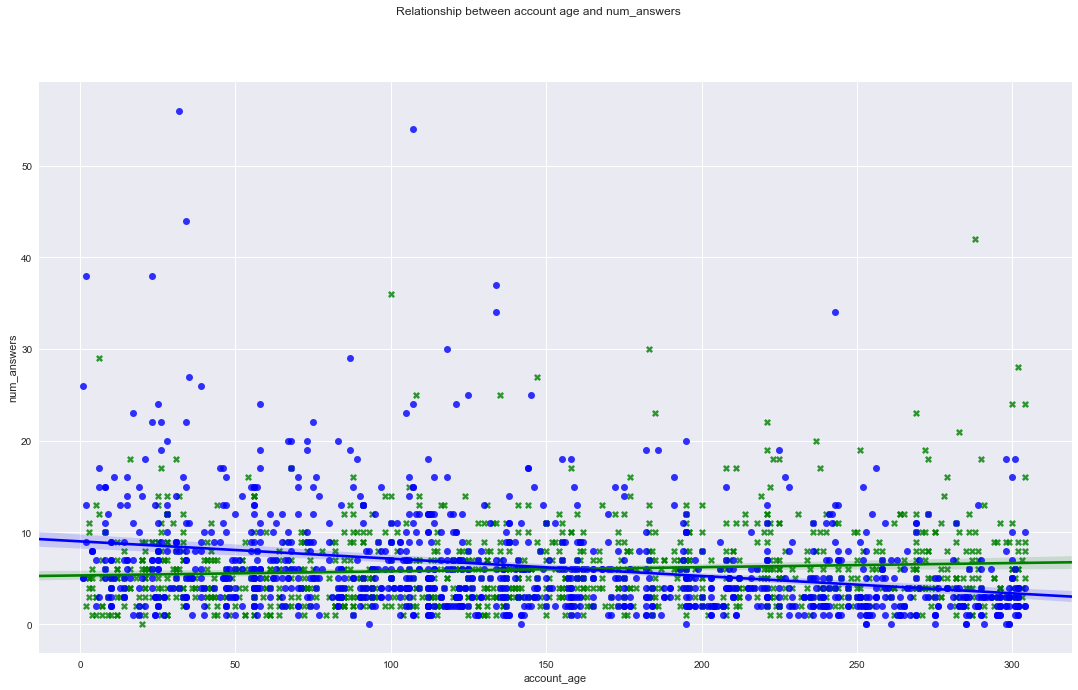

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Relationship between account age and num_answers')
control=sns.regplot(x=control_df["account_age"], 
                    y=control_df["num_answers"],color="g", marker='X')
experiment=sns.regplot(x=experiment_df["account_age"], 
                       y=experiment_df["num_answers"],color="b", marker='o')
sns.despine()

<b> Histogram Visualizations </b>

The account ages were binned into 4 categories. For each category in the control or experiment data set, there is a histogram visualizaing the distribution of number of answers among the 4 categories

In [58]:
def histogram(categories, num_categories): 
    #run the cut method with retbins=True to verify 
    #that the bin intervals are accurate
    pd.cut(control_df.account_age,num_categories, labels=categories,
           retbins=True, include_lowest=True) 
    #the cut method bins account ages into 4 categories
    control_df['category']=pd.cut(control_df.account_age,
                                  num_categories, labels=categories,
                                  include_lowest=True)
    experiment_df['category']=pd.cut(experiment_df.account_age,
                                     num_categories, labels=categories,
                                     include_lowest=True)
    #for every account age bin, a graph for the control data 
    #and experiment data are produced separatedly
    for i in categories: 
        fig, ax =plt.subplots(1,2)
        fig.suptitle('Distribution of answers for '+i+' age accounts')
        a=control_df[control_df.category==i].num_answers
        sns.distplot(a,ax=ax[0])
        ax[0].set_ylim(0, 0.2)
        b=experiment_df[experiment_df.category==i].num_answers
        sns.distplot(b,ax=ax[1])
        ax[1].set_ylim(0, 0.2)
        fig.show()
           

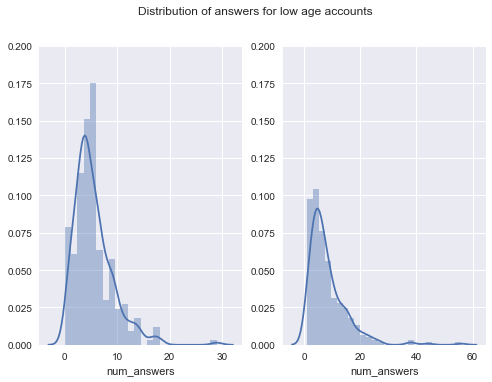

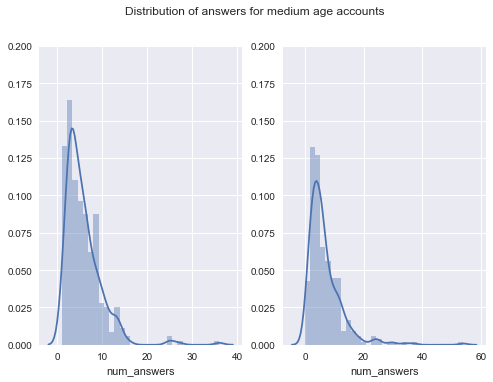

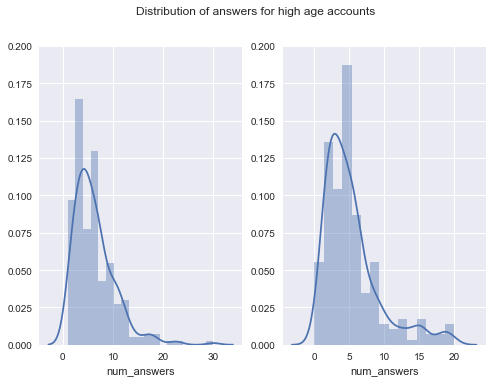

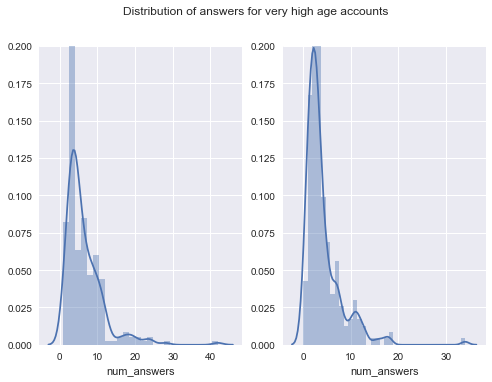

In [61]:
categories=["low","medium","high","very high"]
num_categories=4
histogram(categories,num_categories)


<b> IN CASE </b>

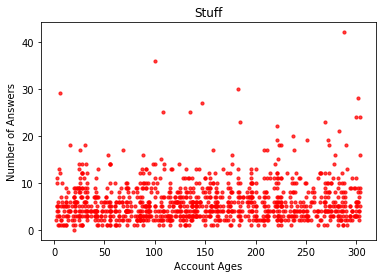

In [55]:
control_df.account_age
age_experiment=np.array(experiment_df.account_age)
_,ax = plt.subplots() # Create the plot object
ax.set_title('Stuff')
ax.set_xlabel('Account Ages')
ax.set_ylabel('Number of Answers')
def scatterplot(x_data, y_data, color = "r", yscale_log=False):
    # Plot the data, set size, color of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)
    if yscale_log == True:
        ax.set_yscale('log')
scatterplot(age_control,ans_control)


In [146]:
def create_bins(df,num_bins): #use data to determine how many bins to create
    bins=[0]
    interval=df.account_age.max()/num_bins
    labels=["low","medium","high","very high"]
    for i in range(num_bins):
        bins.append(interval)
        interval=interval*2
    return bins,labels
breakpoints,labels=create_bins(df,4)


In [189]:
control_heatmap=pd.DataFrame(control_df.num_answers)
control_heatmap['very_high']=np.where(control_df.category=='very high',1,0)
control_heatmap['high']=np.where(control_df.category=='high',1,0)
control_heatmap['medium']=np.where(control_df.category=='medium',1,0)
control_heatmap['low']=np.where(control_df.category=='low',1,0)
control_heatmap.set_index('num_answers',inplace=True) #inplace is set to be True, so df is modified
control_heatmap.sort_index(axis=0)
#sns.heatmap(control_heatmap,vmin=0,vmax=1)

,very_high,high,medium,low
num_answers,,,,
0.0,0,0,0,1
1.0,0,0,1,0
1.0,1,0,0,0
1.0,0,0,1,0
1.0,0,0,1,0
1.0,0,0,1,0
1.0,0,0,0,1
1.0,0,0,0,1
1.0,0,1,0,0
